<a href="https://colab.research.google.com/github/jaeseongrhythm/circadian-predict-AI/blob/main/(%EC%82%AC%EC%A0%84%ED%95%99%EC%8A%B5%EC%9A%A9)_%EC%83%9D%EC%B2%B4_%EA%B8%B0%EC%A4%80%EC%84%A0_%EC%82%AC%ED%9B%84%ED%8F%89%EA%B0%80_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  일주기 생체리듬 기준선 예측 AI v0.21.0
  Training Mode: 전체 학습 파이프라인 실행

--- 기준선 예측 AI 학습 파이프라인 시작 ---
--- 다중 사용자 데이터 로딩 시작: biometric_data ---
  - Person 1: 72000 레코드 로드
  - Person 2: 72000 레코드 로드
--- 총 2명의 데이터 통합 완료: 144000 레코드 ---
--- 기준선 데이터 로딩 시작 (수정된 방식) ---
--- 총 100개의 기준선 데이터 로드 완료 ---

--- 개인별 데이터 처리 시작 ---


개인별 처리 (Person 1):   0%|          | 0/2 [00:00<?, ?it/s]

안정 궤도를 새로 계산합니다 (최초 1회 실행)...


개인별 처리 (Person 1):   0%|          | 0/2 [00:01<?, ?it/s, 일일 궤도 생성 중... (1/50일)]

새로운 안정 궤도를 저장했습니다: baseline_prediction_output_v0.21/stable_limit_cycle.npy


개인별 처리 (Person 2): 100%|██████████| 2/2 [00:29<00:00, 14.64s/it]


--- 기준선 예측 샘플 준비 시작 ---


샘플 생성 중: 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]


--- 총 92개의 샘플 생성 완료 ---

학습 샘플: 73, 검증 샘플: 9

--- 데이터 스케일링 ---
--- 기준선 TFRecord 파일 생성 시작: baseline_prediction_output_v0.21/train_baseline.tfrecord ---


train_baseline.tfrecord 생성 중: 100%|██████████| 73/73 [00:03<00:00, 24.18it/s]


--- 기준선 TFRecord 파일 생성 완료: baseline_prediction_output_v0.21/train_baseline.tfrecord ---
--- 기준선 TFRecord 파일 생성 시작: baseline_prediction_output_v0.21/val_baseline.tfrecord ---


val_baseline.tfrecord 생성 중: 100%|██████████| 9/9 [00:00<00:00, 48.44it/s]


--- 기준선 TFRecord 파일 생성 완료: baseline_prediction_output_v0.21/val_baseline.tfrecord ---

--- 기준선 예측 모델 학습 및 검증 시작 ---

Epoch 1/2
9/9 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - train_loss: 6.3201
10/9 ━━━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - train_loss: 12.2377

Validation Loss: 4.9322
Validation loss improved. Saving model weights to baseline_prediction_output_v0.21/best_baseline_model.weights.h5

Epoch 종료. LCO 보정 궤적 시각화 생성 중...
LCO 궤도 비교 그래프가 baseline_prediction_output_v0.21에 저장되었습니다.

Epoch 2/2
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - train_loss: 13.4377
10/9 ━━━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - train_loss: 9.8482

Validation Loss: 3.5000
Validation loss improved. Saving model weights to baseline_prediction_output_v0.21/best_baseline_model.weights.h5

Epoch 종료. LCO 보정 궤적 시각화 생성 중...
LCO 궤도 비교 그래프가 baseline_prediction_output_v0.21에 저장되었습니다.

--- 학습 및 검증 완료 ---
학습 곡선이 baseline_prediction_output_v0.21/learning_curve.png에 저장되었습니다.


    기준선 예측 AI 학습 파이프라인 완료 (v0.21)

학습이 완료되었습니다. 예측 데모를 실행합니다...

--- 기준

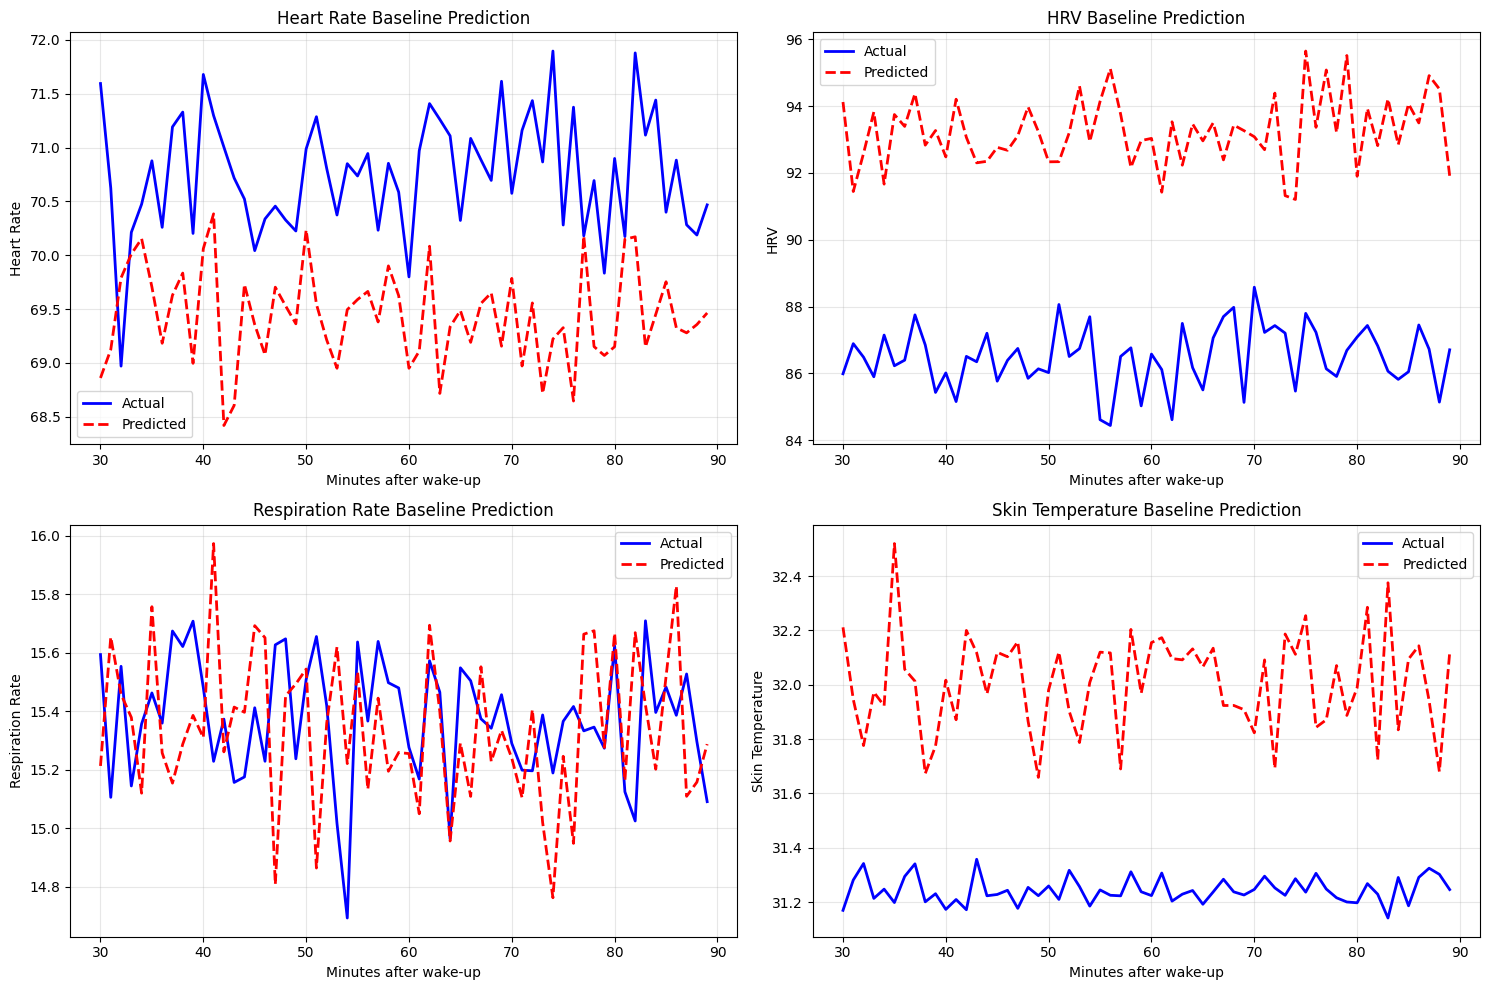


=== 예측 성능 ===
Heart Rate: MAE=1.34, RMSE=1.50
HRV: MAE=6.76, RMSE=6.92
Respiration Rate: MAE=0.26, RMSE=0.33
Skin Temperature: MAE=0.76, RMSE=0.79
기준선 예측 비교 그래프가 baseline_prediction_output_v0.21/baseline_prediction_comparison.png에 저장되었습니다.
예측일의 LCO 궤도 비교 그래프 생성 중...


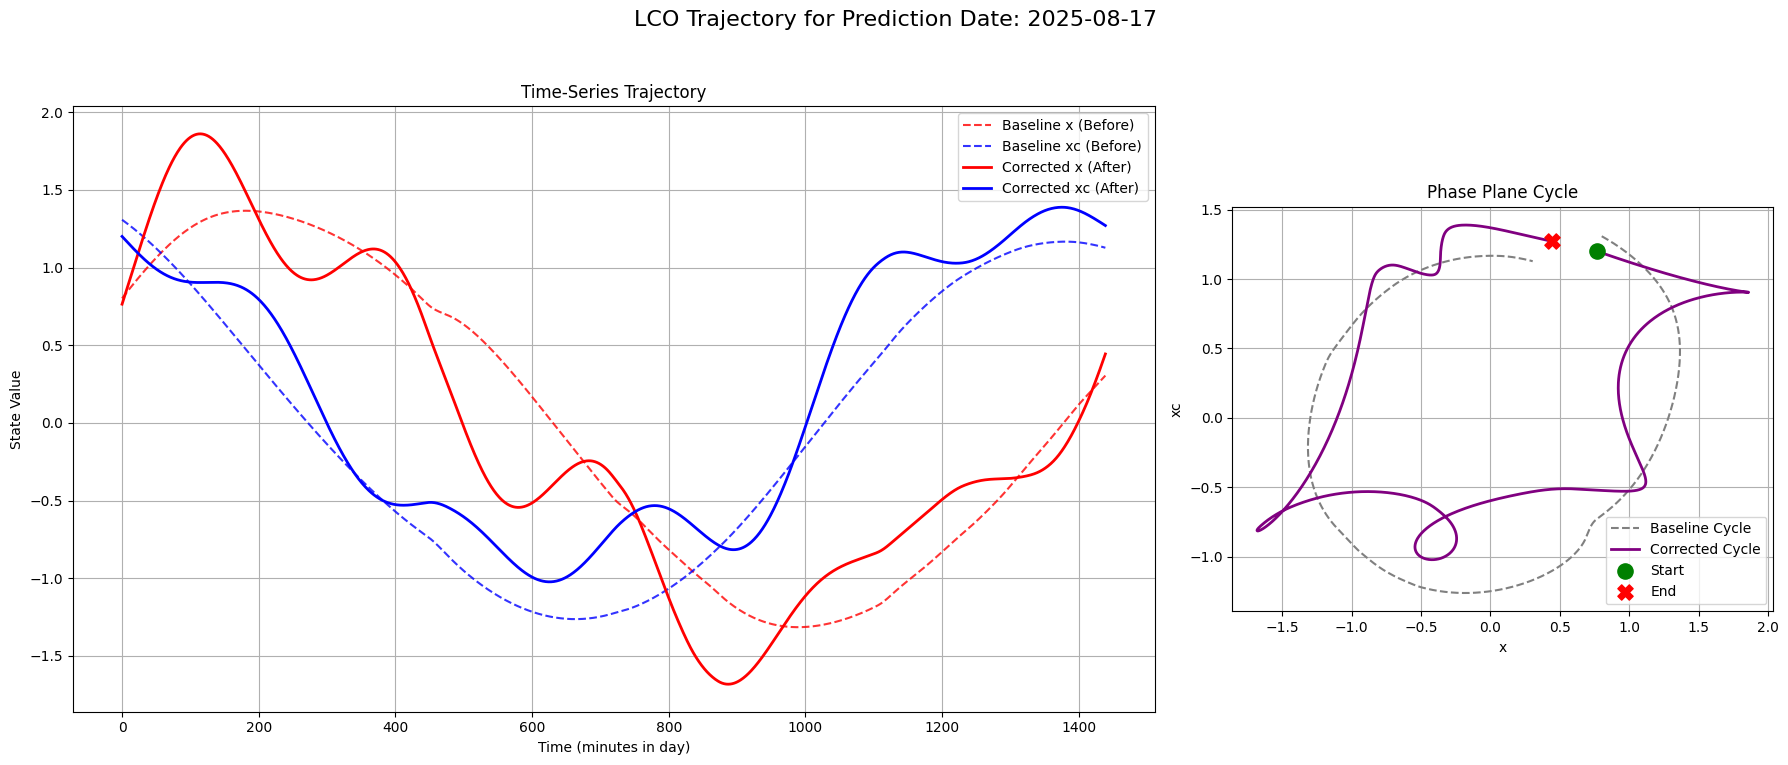

LCO 궤도 비교 그래프가 baseline_prediction_output_v0.21/prediction_day_lco_comparison_2025-08-17.png에 저장되었습니다.

프로그램 실행이 완료되었습니다.


In [1]:
# -*- coding: utf-8 -*-
"""
(사전학습용) 생체 기준선 사후평가 AI
  - 일주기 생체리듬 예측 AI v0.21.0

[v0.21.0 주요 변경사항]:
- 코드 안정성 대폭 강화
- 예측 대상 변경: 무작위 시점 심박수 → 기상 후 30-90분 사이의 4가지 생체지표 기준선
- 다중 사용자 데이터 지원 및 통합 학습
- 어제 기준선 대비 변화량(delta) 예측

[폴더 구조]
|project_root
|--biometirc_data
|  |--person_1
|  |  |--biometric_data_person_1.csv
|  |  |--biometric_data_person_1_baseline.csv
|  |--...
|--baseline_prediction_ai.py

"""

# =============================================================================
# 0. 라이브러리 임포트 및 파이프라인 설정
# =============================================================================
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Concatenate, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, LSTM, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
import joblib
from tqdm import tqdm
import argparse
import random
import math
import bisect
from datetime import datetime, timedelta

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# [OPTIMIZATION] 혼합 정밀도 정책 설정
# mixed_precision.set_global_policy('mixed_float16')  # 주석 처리
mixed_precision.set_global_policy('float32')          # 임시 변경

# --- 파이프라인 제어 설정 ---
OUTPUT_DIR = "baseline_prediction_output_v0.21"
ROOT_DATA_DIR = "biometric_data"

# --- 데이터 및 모델 설정 ---
INPUT_SEQUENCE_LENGTH = 4 * 24 * 60  # 4일
BASELINE_WINDOW = 60  # 기상 후 30-90분 = 60분 윈도우
NUM_METRICS = 4  # heart_rate, hrv, respiration_rate, skin_temp
PHASE_CORRECTION_LOOKBACK_DAYS = 3
DAY_MINUTES = 24 * 60
NUM_MARKERS_TO_KEEP = 3

TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.1

# --- 모델 하이퍼파라미터 ---
D_MODEL = 128
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 256
DROPOUT_RATE = 0.05
NUM_FOURIER_HARMONICS = 5
LSTM_UNITS = 64

# --- 학습 하이퍼파라미터 ---
EPOCHS = 2
BATCH_SIZE = 8
LEARNING_RATE = 0.0005
LAMBDA_REG = 0.1
LAMBDA_CONT = 10.0
LAMBDA_ANCHOR = 5.0

# --- 물리 모델 파라미터 ---
PARAMS = {
    'mu': 0.13, 'q': 1/3, 'k': 0.55, 'alpha0': 0.1, 'I0': 9500,
    'p': 0.5, 'beta': 0.007, 'G': 37, 'rho': 0.032, 'tau_x': 24.2,
}

# =============================================================================
# 1. 생체리듬 물리 모델 (기존 코드 유지)
# =============================================================================
def find_hr_nadir(heart_rate_data, is_sleeping_data, day_minutes=1440):
    num_days = len(heart_rate_data) // day_minutes
    daily_nadirs = []
    for day in range(num_days):
        day_start, day_end = day * day_minutes, (day + 1) * day_minutes
        day_hr, day_sleep = heart_rate_data[day_start:day_end], is_sleeping_data[day_start:day_end]
        sleep_hr = day_hr[day_sleep == 1]
        if len(sleep_hr) > 0:
            original_indices = np.where(day_sleep == 1)[0]
            daily_nadirs.append(original_indices[np.argmin(sleep_hr)])
        else:
            daily_nadirs.append(np.argmin(day_hr))
    return np.mean(daily_nadirs) if daily_nadirs else day_minutes / 2

def _sigmoid(x, k=2, x0=0):
    return 1 / (1 + np.exp(-k * (x - x0)))

def lco_model_ode(t, y, params, light_func, sleep_func):
    x, xc, n = y
    if not np.all(np.isfinite(y)): return [0,0,0]

    mu, q, k, alpha0, I0, p, beta, G, rho, tau_x = params.values()
    I, sigma = light_func(t), sleep_func(t)
    I = max(I, 0)
    alpha = alpha0 * ((I / I0)**p) * (I / (I + 100.0)) if I > 0 else 0
    B_hat = G * (1 - n) * alpha
    B = B_hat * (1 - 0.4 * x) * (1 - 0.4 * xc)

    cbt_min_phase_angle = -170.7 * np.pi / 180.0
    current_phase = np.arctan2(xc, x)
    phase_diff_rad = (current_phase - cbt_min_phase_angle + np.pi) % (2 * np.pi) - np.pi
    psi_c_x = phase_diff_rad * (tau_x / (2 * np.pi)) + (tau_x / 2)
    weight_enter = _sigmoid(psi_c_x, k=2, x0=16.5)
    weight_exit = 1 - _sigmoid(psi_c_x, k=2, x0=21.0)
    wmz_weight = weight_enter * weight_exit * sigma
    Ns_hat_normal = rho * (1/3.0 - sigma)
    Ns_hat_wmz = rho * (1/3.0)
    Ns_hat = Ns_hat_normal * (1 - wmz_weight) + Ns_hat_wmz * wmz_weight
    Ns = Ns_hat * (1 - np.tanh(10 * x))

    dxdt = (np.pi / 12.0) * (xc + mu * (x/3.0 + (4.0/3.0)*x**3 - (256.0/105.0)*x**7) + B + Ns)
    tau_term_sq = (24.0 / (0.99729 * tau_x))**2
    dxc_dt = (np.pi / 12.0) * (q * B * xc - x * (tau_term_sq + k * B))
    dn_dt = 60.0 * (alpha * (1 - n) - beta * n)
    return [dxdt, dxc_dt, dn_dt]

def lco_model_jacobian(t, y, params, light_func, sleep_func):
    x, xc, n = y
    if not np.all(np.isfinite(y)): return np.zeros((3,3))

    mu, q, k, alpha0, I0, p, beta, G, rho, tau_x = params.values()
    I, sigma = light_func(t), sleep_func(t)
    I = max(I, 0)
    alpha = alpha0 * ((I / I0)**p) * (I / (I + 100.0)) if I > 0 else 0
    cbt_min_phase_angle = -170.7 * np.pi / 180.0
    current_phase = np.arctan2(xc, x)
    phase_diff_rad = (current_phase - cbt_min_phase_angle + np.pi) % (2 * np.pi) - np.pi
    psi_c_x = phase_diff_rad * (tau_x / (2 * np.pi)) + (tau_x / 2)
    weight_enter = _sigmoid(psi_c_x, k=2, x0=16.5)
    weight_exit = 1 - _sigmoid(psi_c_x, k=2, x0=21.0)
    wmz_weight = weight_enter * weight_exit * sigma
    Ns_hat_normal = rho * (1/3.0 - sigma)
    Ns_hat_wmz = rho * (1/3.0)
    Ns_hat = Ns_hat_normal * (1 - wmz_weight) + Ns_hat_wmz * wmz_weight
    dB_dx = -0.4 * G * alpha * (1 - n) * (1 - 0.4 * xc)
    dB_dxc = -0.4 * G * alpha * (1 - n) * (1 - 0.4 * x)
    dB_dn = -G * alpha * (1 - 0.4 * x) * (1 - 0.4 * xc)
    dNs_dx = -Ns_hat * 10.0 * (1.0 / np.cosh(10 * x))**2
    J = np.zeros((3, 3))
    J[0, 0] = (np.pi / 12.0) * (mu * (1/3.0 + 4.0 * x**2 - (256.0*7.0/105.0) * x**6) + dB_dx + dNs_dx)
    J[0, 1] = (np.pi / 12.0) * (1.0 + dB_dxc)
    J[0, 2] = (np.pi / 12.0) * dB_dn
    B = G * alpha * (1 - n) * (1 - 0.4 * x) * (1 - 0.4 * xc)
    tau_term_sq = (24.0 / (0.99729 * tau_x))**2
    J[1, 0] = (np.pi / 12.0) * (q * xc * dB_dx - (tau_term_sq + k * B) - k * x * dB_dx)
    J[1, 1] = (np.pi / 12.0) * (q * B + q * xc * dB_dxc - k * x * dB_dxc)
    J[1, 2] = (np.pi / 12.0) * (q * xc * dB_dn - k * x * dB_dn)
    J[2, 2] = 60.0 * (-alpha - beta)
    return J

# =============================================================================
# 2. 데이터 로딩 및 통합 함수 (기존 코드 유지)
# =============================================================================
def load_all_biometric_data(root_dir=ROOT_DATA_DIR):
    """모든 person의 데이터를 통합하여 로드"""
    print(f"--- 다중 사용자 데이터 로딩 시작: {root_dir} ---")
    all_data = []
    person_ids = []

    if not os.path.exists(root_dir):
        raise FileNotFoundError(f"데이터 디렉토리를 찾을 수 없습니다: {root_dir}")

    for person_folder in sorted(os.listdir(root_dir)):
        if person_folder.startswith("person_"):
            person_id = int(person_folder.split("_")[1])
            csv_path = os.path.join(root_dir, person_folder, f"biometric_data_{person_folder}.csv")

            if os.path.exists(csv_path):
                df = pd.read_csv(csv_path)
                df['timestamp'] = pd.to_datetime(df['timestamp'])
                df['person_id'] = person_id
                all_data.append(df)
                person_ids.append(person_id)
                print(f"  - Person {person_id}: {len(df)} 레코드 로드")

    if not all_data:
        raise ValueError("로드된 데이터가 없습니다.")

    combined_df = pd.concat(all_data, ignore_index=True)
    print(f"--- 총 {len(person_ids)}명의 데이터 통합 완료: {len(combined_df)} 레코드 ---")

    return combined_df, sorted(person_ids)

def load_baseline_lookup(root_dir=ROOT_DATA_DIR):
    """
    [수정된 함수]
    'Long' 형식의 baseline CSV를 읽어 AI가 사용하는 (person_id, date) 키의 딕셔너리로 변환합니다.
    """
    print(f"--- 기준선 데이터 로딩 시작 (수정된 방식) ---")
    baseline_lookup = {}
    baseline_metric_cols = ['heart_rate', 'hrv', 'respiration_rate', 'skin_temp']

    for person_folder in sorted(os.listdir(root_dir)):
        if person_folder.startswith("person_"):
            person_id = int(person_folder.split("_")[1])
            baseline_path = os.path.join(root_dir, person_folder,
                                       f"biometric_data_{person_folder}_baseline.csv")

            if os.path.exists(baseline_path):
                baseline_df = pd.read_csv(baseline_path)
                if baseline_df.empty:
                    continue

                baseline_df['timestamp'] = pd.to_datetime(baseline_df['timestamp'])
                baseline_df['date'] = baseline_df['timestamp'].dt.date.astype(str)

                for date, group_df in baseline_df.groupby('date'):
                    if len(group_df) == BASELINE_WINDOW:
                        values = group_df[baseline_metric_cols].values
                        key = (person_id, date)
                        baseline_lookup[key] = values

    print(f"--- 총 {len(baseline_lookup)}개의 기준선 데이터 로드 완료 ---")
    return baseline_lookup

# =============================================================================
# 3. 딥러닝 모델 정의 (IntegratedModel 수정됨)
# =============================================================================
@tf.keras.utils.register_keras_serializable()
class FourierTrajectoryLayer(tf.keras.layers.Layer):
    """
    푸리에 계수와 동적 경계점(시작/끝)을 입력받아,
    해당 경계 조건을 만족하는 일일 보정 궤적을 생성하는 레이어.
    """
    def __init__(self, num_harmonics, **kwargs):
        super(FourierTrajectoryLayer, self).__init__(**kwargs)
        self.num_harmonics = num_harmonics
        self.output_dim = DAY_MINUTES
        self.t = tf.constant(np.linspace(0.0, 2 * np.pi, self.output_dim), dtype=tf.float32)

    def call(self, correction_params):
        original_dtype = correction_params.dtype
        correction_params_f32 = tf.cast(correction_params, tf.float32)

        num_coeffs_per_traj = 1 + 2 * self.num_harmonics
        num_total_coeffs = num_coeffs_per_traj * 2
        coeffs = correction_params_f32[:, :num_total_coeffs]
        endpoints = correction_params_f32[:, num_total_coeffs:]

        coeffs_x = coeffs[:, :num_coeffs_per_traj]
        coeffs_xc = coeffs[:, num_coeffs_per_traj:]
        endpoints_x = endpoints[:, 0:2]
        endpoints_xc = endpoints[:, 2:4]

        traj_x = self._build_trajectory(coeffs_x, endpoints_x)
        traj_xc = self._build_trajectory(coeffs_xc, endpoints_xc)

        result = tf.stack([traj_x, traj_xc], axis=-1)
        return tf.cast(result, original_dtype)

    def _build_trajectory(self, coeffs, endpoints):
        a0 = coeffs[:, 0:1]
        a_n = coeffs[:, 1:self.num_harmonics + 1]
        b_n = coeffs[:, self.num_harmonics + 1:]

        trajectory = a0
        for n in range(1, self.num_harmonics + 1):
            trajectory += a_n[:, n-1:n] * tf.cos(n * self.t)
            trajectory += b_n[:, n-1:n] * tf.sin(n * self.t)

        raw_start = trajectory[:, 0:1]
        raw_end = trajectory[:, -1:]
        target_start = endpoints[:, 0:1]
        target_end = endpoints[:, 1:2]

        ramp = tf.linspace(0.0, 1.0, self.output_dim)
        ramp = tf.expand_dims(ramp, 0)

        linear_correction = raw_start + (raw_end - raw_start) * ramp
        target_linear = target_start + (target_end - target_start) * ramp

        adjusted_trajectory = trajectory - linear_correction + target_linear
        return adjusted_trajectory

    def get_config(self):
        config = super(FourierTrajectoryLayer, self).get_config()
        config.update({"num_harmonics": self.num_harmonics})
        return config

def build_fourier_correction_model(lookback_minutes, num_harmonics, lstm_units):
    """기존 코드 유지"""
    num_coeffs_per_traj = 1 + 2 * num_harmonics
    output_size = (num_coeffs_per_traj * 2) + 4

    input_lux = Input(shape=(lookback_minutes, 1), name='corr_input_lux')
    input_sleep = Input(shape=(lookback_minutes, 1), name='corr_input_sleep')
    input_body1 = Input(shape=(lookback_minutes, 3), name='corr_input_body1')
    input_body2 = Input(shape=(lookback_minutes, 1), name='corr_input_body2')
    input_zeit1 = Input(shape=(lookback_minutes, 1), name='corr_input_zeit1')
    input_zeit2 = Input(shape=(lookback_minutes, 1), name='corr_input_zeit2')
    input_zeit3 = Input(shape=(lookback_minutes, 1), name='corr_input_zeit3')

    def create_feat_extractor(inp, name):
        x = Conv1D(16, 30, activation='relu', padding='causal', name=f'corr_{name}_cnn1')(inp)
        x = Conv1D(8, 30, activation='relu', padding='causal', name=f'corr_{name}_cnn2')(x)
        return x

    features = [
        create_feat_extractor(input_lux, 'lux'), create_feat_extractor(input_sleep, 'sleep'),
        create_feat_extractor(input_body1, 'body1'), create_feat_extractor(input_body2, 'body2'),
        create_feat_extractor(input_zeit1, 'zeit1'), create_feat_extractor(input_zeit2, 'zeit2'),
        create_feat_extractor(input_zeit3, 'zeit3'),
    ]
    combined_feature_sequence = Concatenate(axis=-1, dtype='float32')(features)
    lstm_output = LSTM(lstm_units, return_sequences=False, name='correction_lstm')(combined_feature_sequence)
    x = Dropout(0.2)(lstm_output)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    correction_params = Dense(output_size, activation='linear', name='correction_params', dtype='float32')(x)

    model_inputs = [input_lux, input_sleep, input_body1, input_body2, input_zeit1, input_zeit2, input_zeit3]
    model = Model(inputs=model_inputs, outputs=correction_params, name='FourierCorrectionModel')
    return model

@tf.keras.utils.register_keras_serializable()
class PositionalEncoding(tf.keras.layers.Layer):
    """기존 코드 유지"""
    def __init__(self, position, d_model, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.position = position
        self.d_model = d_model
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :], d_model=d_model)
        sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])
        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs, **kwargs):
        return inputs + tf.cast(self.pos_encoding[:, :tf.shape(inputs)[1], :], dtype=inputs.dtype)

    def get_config(self):
        config = super(PositionalEncoding, self).get_config()
        config.update({"position": self.position, "d_model": self.d_model})
        return config

def build_main_feature_extractors(time_steps=INPUT_SEQUENCE_LENGTH, d_model=D_MODEL):
    """기존 코드 유지"""
    feature_proportions = {
        'lco': 0.25, 'lux': 0.125, 'sleep': 0.125, 'body1': 0.25,
        'body2': 0.0625, 'zeit1': 0.0625, 'zeit2': 0.0625, 'zeit3': 0.0625,
    }
    cnn_block_map = { name: max(2, int(d_model * prop) // 2 * 2) for name, prop in feature_proportions.items() }
    current_sum = sum(cnn_block_map.values())
    if current_sum != d_model: cnn_block_map['lco'] += d_model - current_sum

    def create_cnn_block(n_features, name_prefix):
        return tf.keras.Sequential([
            Conv1D(filters=32, kernel_size=5, activation='relu', padding='causal', name=f"{name_prefix}_cnn1"),
            Conv1D(filters=n_features, kernel_size=5, activation='relu', padding='causal', name=f"{name_prefix}_cnn2")
        ], name=f"{name_prefix}_cnn_block")

    input_lco = Input(shape=(time_steps, 2), name='input_lco')
    features_lco = create_cnn_block(cnn_block_map['lco'], 'lco')(input_lco)
    lco_feature_extractor = Model(inputs=input_lco, outputs=features_lco, name='LCOFeatureExtractor')

    input_lux = Input(shape=(time_steps, 1), name='input_lux')
    input_sleep = Input(shape=(time_steps, 1), name='input_sleep')
    input_body1 = Input(shape=(time_steps, 3), name='input_body1')
    input_body2 = Input(shape=(time_steps, 1), name='input_body2')
    input_zeit1 = Input(shape=(time_steps, 1), name='input_zeit1')
    input_zeit2 = Input(shape=(time_steps, 1), name='input_zeit2')
    input_zeit3 = Input(shape=(time_steps, 1), name='input_zeit3')

    features_lux = create_cnn_block(cnn_block_map['lux'], 'lux')(input_lux)
    features_sleep = create_cnn_block(cnn_block_map['sleep'], 'sleep')(input_sleep)
    features_body1 = create_cnn_block(cnn_block_map['body1'], 'body1')(input_body1)
    features_body2 = create_cnn_block(cnn_block_map['body2'], 'body2')(input_body2)
    features_zeit1 = create_cnn_block(cnn_block_map['zeit1'], 'zeit1')(input_zeit1)
    features_zeit2 = create_cnn_block(cnn_block_map['zeit2'], 'zeit2')(input_zeit2)
    features_zeit3 = create_cnn_block(cnn_block_map['zeit3'], 'zeit3')(input_zeit3)

    combined_other_features = Concatenate(axis=-1, name='combined_other_features', dtype='float32')([
        features_lux, features_sleep, features_body1,
        features_body2, features_zeit1, features_zeit2, features_zeit3
    ])

    other_inputs = [input_lux, input_sleep, input_body1, input_body2, input_zeit1, input_zeit2, input_zeit3]
    other_feature_extractor = Model(inputs=other_inputs, outputs=combined_other_features, name='OtherFeatureExtractor')

    return lco_feature_extractor, other_feature_extractor

@tf.keras.utils.register_keras_serializable()
class ContextualTransformerBlock(tf.keras.layers.Layer):
    """기존 코드 유지"""
    def __init__(self, d_model, num_heads, dff, rate=0.1, **kwargs):
        super(ContextualTransformerBlock, self).__init__(**kwargs)
        self.d_model, self.num_heads, self.dff, self.rate = d_model, num_heads, dff, rate
        self.mha1 = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.mha2 = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([Dense(dff, activation='relu'), Dense(d_model)])
        self.layernorm1, self.layernorm2, self.layernorm3 = LayerNormalization(epsilon=1e-6), LayerNormalization(epsilon=1e-6), LayerNormalization(epsilon=1e-6)
        self.dropout1, self.dropout2, self.dropout3 = Dropout(rate), Dropout(rate), Dropout(rate)

    def call(self, inputs, training=False, **kwargs):
        past_info, current_info = inputs
        attn_output_current = self.mha1(query=current_info, key=current_info, value=current_info, training=training)
        current_info_sa = self.layernorm1(current_info + self.dropout1(attn_output_current, training=training))
        attn_output_cross = self.mha2(query=current_info_sa, key=past_info, value=past_info, training=training)
        current_info_contextualized = self.layernorm2(current_info_sa + self.dropout2(attn_output_cross, training=training))
        ffn_output = self.ffn(current_info_contextualized)
        final_output = self.layernorm3(current_info_contextualized + self.dropout3(ffn_output, training=training))
        return final_output

    def get_config(self):
        config = super(ContextualTransformerBlock, self).get_config()
        config.update({"d_model": self.d_model, "num_heads": self.num_heads, "dff": self.dff, "rate": self.rate})
        return config

@tf.keras.utils.register_keras_serializable()
class SelfAttentionBlock(tf.keras.layers.Layer):
    """기존 코드 유지"""
    def __init__(self, d_model, num_heads, dff, rate=0.1, **kwargs):
        super(SelfAttentionBlock, self).__init__(**kwargs)
        self.d_model, self.num_heads, self.dff, self.rate = d_model, num_heads, dff, rate
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([Dense(dff, activation='relu'), Dense(d_model)])
        self.layernorm1, self.layernorm2 = LayerNormalization(epsilon=1e-6), LayerNormalization(epsilon=1e-6)
        self.dropout1, self.dropout2 = Dropout(rate), Dropout(rate)

    def call(self, x, training=False, **kwargs):
        attn_output = self.mha(query=x, key=x, value=x, training=training)
        out1 = self.layernorm1(x + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

    def get_config(self):
        config = super(SelfAttentionBlock, self).get_config()
        config.update({"d_model": self.d_model, "num_heads": self.num_heads, "dff": self.dff, "rate": self.rate})
        return config

@tf.keras.utils.register_keras_serializable()
class MainPredictor(tf.keras.Model):
    """수정된 버전 - 기준선 예측을 위해"""
    def __init__(self, num_layers, d_model, num_heads, dff, baseline_window, num_metrics, rate=0.1, **kwargs):
        super(MainPredictor, self).__init__(**kwargs)
        self.num_layers = num_layers
        self.d_model = d_model
        self.num_heads = num_heads
        self.dff = dff
        self.baseline_window = baseline_window
        self.num_metrics = num_metrics
        self.rate = rate

        self.first_block = ContextualTransformerBlock(d_model, num_heads, dff, rate)
        self.other_blocks = [SelfAttentionBlock(d_model, num_heads, dff, rate) for _ in range(num_layers - 1)]

        self.prediction_head = tf.keras.Sequential([
            Dense(256, activation='relu', name="pred_head_dense1"),
            Dropout(rate),
            Dense(128, activation='relu', name="pred_head_dense2"),
            Dropout(rate),
            Dense(baseline_window * num_metrics, name="final_prediction", dtype='float32'),
            Reshape((baseline_window, num_metrics))
        ], name="BASELINE_PREDICTION_HEAD")

    def call(self, inputs, training=False, **kwargs):
        encoded_features, past_info, last_lco = inputs
        current_info_length = 2 * DAY_MINUTES
        current_info = encoded_features[:, -current_info_length:, :]
        x = self.first_block((past_info, current_info), training=training)
        for block in self.other_blocks:
            x = block(x, training=training)
        pooled_vector = tf.reduce_mean(x, axis=1)
        last_vector = x[:, -1, :]
        combined_final_vector = tf.concat([pooled_vector, last_vector, last_lco], axis=-1)
        predictions = self.prediction_head(combined_final_vector)
        return predictions

    def get_config(self):
        return {
            "num_layers": self.num_layers,
            "d_model": self.d_model,
            "num_heads": self.num_heads,
            "dff": self.dff,
            "baseline_window": self.baseline_window,
            "num_metrics": self.num_metrics,
            "rate": self.rate
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

@tf.keras.utils.register_keras_serializable()
class IntegratedModel(Model):
    """
    [수정된 버전]
    - __init__ 생성자에서 하위 모델과 설정을 명시적으로 저장합니다.
    - `return_trajectory` 플래그를 추가하여 LCO 궤도 시각화를 지원합니다.
    - `call` 메소드에서 `return_trajectory` 플래그에 따라 분기하여 궤도 정보를 반환합니다.
    """
    def __init__(self, lco_feature_extractor, other_feature_extractor,
                 fourier_correction_model, main_predictor, config, **kwargs):
        super(IntegratedModel, self).__init__(**kwargs)
        self.lco_feature_extractor = lco_feature_extractor
        self.other_feature_extractor = other_feature_extractor
        self.fourier_correction_model = fourier_correction_model
        self.main_predictor = main_predictor
        self.config = config

        self.fourier_layer = FourierTrajectoryLayer(config['num_harmonics'])
        self.pos_encoding_layer = PositionalEncoding(
            position=config['input_seq_len'],
            d_model=config['d_model']
        )

        self.lambda_reg = config['lambda_reg']
        self.lambda_cont = config['lambda_cont']
        self.lambda_anchor = config['lambda_anchor']

        # LCO 궤적 시각화를 위한 플래그
        self.return_trajectory = False

    def call(self, inputs, training=False):
        time_offset = inputs['time_offset']
        batch_size = tf.shape(time_offset)[0]
        num_main_seq_days = self.config['input_seq_len'] // DAY_MINUTES
        lookback_minutes = self.config['lookback_days'] * DAY_MINUTES

        # --- 1. 일별 보정 궤적(Delta) 생성 ---
        correction_input_keys = ['corr_input_lux', 'corr_input_sleep', 'corr_input_body1',
                               'corr_input_body2', 'corr_input_zeit1', 'corr_input_zeit2', 'corr_input_zeit3']
        correction_inputs_list = [inputs[key] for key in correction_input_keys]

        padding_minutes = (self.config['lookback_days'] - 1) * DAY_MINUTES
        padded_correction_inputs = []
        for data_tensor in correction_inputs_list:
            num_features = tf.shape(data_tensor)[-1]
            paddings = tf.zeros([batch_size, padding_minutes, num_features], dtype=data_tensor.dtype)
            padded_tensor = Concatenate(axis=1)([paddings, data_tensor])
            padded_correction_inputs.append(padded_tensor)

        framed_inputs = [tf.signal.frame(data, frame_length=lookback_minutes, frame_step=DAY_MINUTES, axis=1)
                        for data in padded_correction_inputs]
        transposed_framed_inputs = [tf.transpose(f, [1, 0, 2, 3]) for f in framed_inputs]

        def parallel_correction_fn(elems):
            correction_params = self.fourier_correction_model(list(elems), training=training)
            return self.fourier_layer(correction_params)

        all_daily_curves = tf.map_fn(
            fn=parallel_correction_fn,
            elems=transposed_framed_inputs,
            fn_output_signature=tf.TensorSpec(shape=[None, DAY_MINUTES, 2], dtype=self.compute_dtype)
        )
        all_daily_curves_swapped = tf.transpose(all_daily_curves, [1, 0, 2, 3])
        full_correction_block = tf.reshape(all_daily_curves_swapped, [batch_size, -1, 2])

        # --- [시각화용] 전체 보정 궤적 계산 ---
        full_baseline_trajectory = inputs['baseline_inputs']
        full_correction_block_casted = tf.cast(full_correction_block, full_baseline_trajectory.dtype)
        full_corrected_trajectory = full_baseline_trajectory + full_correction_block_casted

        # --- 2. 주 예측 모델을 위한 입력 생성 ---
        input_seq_len = self.config['input_seq_len']
        offsets = tf.cast(time_offset, dtype=tf.int32)
        sequence_indices = tf.range(input_seq_len, dtype=tf.int32)[tf.newaxis, :]
        time_indices = offsets + sequence_indices

        final_delta_trajectory = tf.gather(full_correction_block, time_indices, batch_dims=1)
        aligned_baseline = tf.gather(inputs['baseline_inputs'], time_indices, batch_dims=1)

        other_input_keys = ['input_lux', 'input_sleep', 'input_body1', 'input_body2',
                           'input_zeit1', 'input_zeit2', 'input_zeit3']
        main_cnn_inputs_other_list = [tf.gather(inputs[key], time_indices, batch_dims=1)
                                     for key in other_input_keys]

        corrected_lco_trajectory = tf.cast(aligned_baseline + final_delta_trajectory, self.compute_dtype)

        # --- 3. 주 예측 모델 실행 ---
        lco_features = self.lco_feature_extractor(corrected_lco_trajectory, training=training)
        other_features = self.other_feature_extractor(main_cnn_inputs_other_list, training=training)
        combined_features = Concatenate(axis=-1, dtype='float32')([lco_features, other_features])
        combined_features = tf.cast(combined_features, self.compute_dtype)
        encoded_features = self.pos_encoding_layer(combined_features)

        past_info_indices = inputs['past_info_indices']
        batch_indices = tf.tile(tf.range(batch_size, dtype=tf.int64)[:, tf.newaxis],
                               [1, self.config['num_markers_to_keep'] * 3])
        gather_indices = tf.stack([tf.reshape(batch_indices, [-1]),
                                  tf.reshape(tf.maximum(past_info_indices, 0), [-1])], axis=1)
        past_info_flat = tf.gather_nd(encoded_features, gather_indices)
        past_info = tf.reshape(past_info_flat, [batch_size, self.config['num_markers_to_keep'] * 3,
                                               self.config['d_model']])
        past_info *= tf.cast(tf.not_equal(past_info_indices, -1), self.compute_dtype)[:, :, tf.newaxis]

        last_lco_corrected = corrected_lco_trajectory[:, -1, :]

        y_pred_delta = self.main_predictor((encoded_features, past_info, last_lco_corrected), training=training)

        # --- [수정] 시각화를 위한 궤도 반환 로직 ---
        if self.return_trajectory:
            # 예측값, 보정된 전체 궤도, 기준 전체 궤도를 반환
            return y_pred_delta, full_corrected_trajectory, full_baseline_trajectory

        # --- 4. 학습 시 손실 계산 ---
        if training:
            all_daily_curves_f32 = tf.cast(all_daily_curves, tf.float32)
            reg_loss = tf.reduce_mean(tf.square(all_daily_curves_f32)) * self.lambda_reg
            self.add_loss(reg_loss)

            num_total_days = self.config['lookback_days'] + num_main_seq_days
            full_corrected_reshaped = tf.reshape(full_corrected_trajectory,
                                               [batch_size, num_total_days, DAY_MINUTES, 2])
            full_corrected_reshaped_f32 = tf.cast(full_corrected_reshaped, tf.float32)
            continuity_gaps = full_corrected_reshaped_f32[:, :-1, -1, :] - full_corrected_reshaped_f32[:, 1:, 0, :]
            cont_loss = tf.reduce_mean(tf.square(continuity_gaps)) * self.lambda_cont
            self.add_loss(cont_loss)

            corrected_lco_trajectory_f32 = tf.cast(corrected_lco_trajectory, tf.float32)
            last_day_corrected_x = tf.reshape(corrected_lco_trajectory_f32,
                                             [batch_size, num_main_seq_days, DAY_MINUTES, 2])[:, -1, :, 0]
            predicted_cbt_nadir_idx = tf.cast(tf.argmin(last_day_corrected_x, axis=1), tf.float32)

            full_inputs_for_anchor = tf.cast(inputs['full_inputs_for_anchor'], tf.float32)
            hr_series, sleep_series = full_inputs_for_anchor[:, :, 0], full_inputs_for_anchor[:, :, 1]
            sleep_mask = tf.cast(sleep_series > 0.5, tf.float32)
            has_sleep = tf.reduce_any(tf.cast(sleep_mask, tf.bool), axis=1)
            hr_in_sleep = hr_series * sleep_mask + (1.0 - sleep_mask) * 1e9
            nadir_in_sleep_indices = tf.cast(tf.argmin(hr_in_sleep, axis=1), tf.float32)
            nadir_overall_indices = tf.cast(tf.argmin(hr_series, axis=1), tf.float32)
            actual_hr_nadir_idx = tf.where(has_sleep, nadir_in_sleep_indices, nadir_overall_indices)
            actual_cbt_nadir_idx = (actual_hr_nadir_idx + 120) % DAY_MINUTES
            anchor_loss_val = tf.reduce_mean(tf.square(predicted_cbt_nadir_idx - actual_cbt_nadir_idx)) / (DAY_MINUTES**2)
            anchor_loss = anchor_loss_val * self.lambda_anchor
            self.add_loss(anchor_loss)

        if not training and 'reference_baseline' in inputs:
            reference_baseline = inputs['reference_baseline']
            y_pred_delta_casted = tf.cast(y_pred_delta, reference_baseline.dtype)
            y_pred_final = reference_baseline + y_pred_delta_casted
            return y_pred_final
        else:
            return y_pred_delta

    def get_config(self):
        return {"config": self.config}

    @classmethod
    def from_config(cls, config_data, custom_objects=None):
        return cls(**config_data)

# =============================================================================
# 4. 기준선 예측을 위한 TFRecord 생성 (기존 코드 유지)
# =============================================================================
def find_wake_up_time(day_data):
    """하루 데이터에서 기상 시점 찾기"""
    is_sleeping = day_data['is_sleeping'].values
    for i in range(1, len(is_sleeping)):
        if is_sleeping[i-1] == 1 and is_sleeping[i] == 0:
            return i
    return None

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def serialize_example(inputs_dict):
    feature = {key: _bytes_feature(tf.io.serialize_tensor(value).numpy())
              for key, value in inputs_dict.items()}
    return tf.train.Example(features=tf.train.Features(feature=feature)).SerializeToString()

def moving_average_np(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def precompute_all_markers_for_person(person_df):
    """개인별 마커 계산"""
    calculation_df = person_df.assign(
        corrected_skin_temp=person_df['skin_temp'] - person_df['ambient_temp']
    )

    heart_rate = calculation_df['heart_rate'].values
    is_sleeping = calculation_df['is_sleeping'].values
    temp_series = calculation_df['corrected_skin_temp'].values

    hr_in_sleep = np.where(is_sleeping > 0.5, heart_rate, np.inf)
    nadir_indices_abs = [
        i + np.argmin(hr_in_sleep[i:i+60])
        for i in range(0, len(calculation_df) - 60, 60)
        if np.any(np.isfinite(hr_in_sleep[i:i+60]))
    ]

    if len(temp_series) > 40:
        temp_deriv_smoothed = moving_average_np(np.gradient(moving_average_np(temp_series, 30)), 10)
        offset_to_align = len(temp_series) - len(temp_deriv_smoothed)
        onset_indices_abs = list(np.where(temp_deriv_smoothed > 0.001)[0] + offset_to_align)
        offset_indices_abs = list(np.where(temp_deriv_smoothed < -0.001)[0] + offset_to_align)
    else:
        onset_indices_abs, offset_indices_abs = [], []

    return {
        "onset": sorted(list(set(onset_indices_abs))),
        "nadir": sorted(list(set(nadir_indices_abs))),
        "offset": sorted(list(set(offset_indices_abs)))
    }

def generate_past_info_indices_optimized(precomputed_markers, selection_start_abs, selection_end_abs,
                                        main_seq_start_in_full_df, config):
    """기존 함수 유지"""
    num_markers_to_keep = config['num_markers_to_keep']
    padding_value = -1
    final_indices_relative = []

    for marker_type in ["onset", "nadir", "offset"]:
        marker_candidates_abs = precomputed_markers[marker_type]
        start_idx = bisect.bisect_left(marker_candidates_abs, selection_start_abs)
        end_idx = bisect.bisect_right(marker_candidates_abs, selection_end_abs)
        valid_candidates = marker_candidates_abs[start_idx:end_idx]

        if len(valid_candidates) > 0:
            top_indices_abs = valid_candidates[-num_markers_to_keep:]
            top_indices_relative = [idx - main_seq_start_in_full_df for idx in top_indices_abs]
            final_indices_relative.extend(reversed(top_indices_relative))
            if len(top_indices_relative) < num_markers_to_keep:
                final_indices_relative.extend([padding_value] * (num_markers_to_keep - len(top_indices_relative)))
        else:
            final_indices_relative.extend([padding_value] * num_markers_to_keep)

    return np.array(final_indices_relative, dtype=np.int64)

def create_baseline_tfrecords(df_all, df_all_scaled, baseline_lookup, indices, config,
                             file_path, person_markers_dict):
    """기준선 예측을 위한 TFRecord 생성"""
    print(f"--- 기준선 TFRecord 파일 생성 시작: {file_path} ---")

    main_cnn_other_cols = {
        'input_lux': ['lux'], 'input_sleep': ['is_sleeping'],
        'input_body1': ['heart_rate', 'hrv', 'respiration_rate'],
        'input_body2': ['skin_temp'], 'input_zeit1': ['meal_event'],
        'input_zeit2': ['exercise_event'], 'input_zeit3': ['ambient_temp'],
    }
    fourier_corr_cols = {
        'corr_input_lux': ['lux'], 'corr_input_sleep': ['is_sleeping'],
        'corr_input_body1': ['heart_rate', 'hrv', 'respiration_rate'],
        'corr_input_body2': ['skin_temp'], 'corr_input_zeit1': ['meal_event'],
        'corr_input_zeit2': ['exercise_event'], 'corr_input_zeit3': ['ambient_temp'],
    }
    anchor_loss_cols = ['heart_rate', 'is_sleeping']

    num_main_seq_days = config['input_seq_len'] // DAY_MINUTES

    df_unscaled_np = df_all.to_numpy()
    df_scaled_np = df_all_scaled.to_numpy()
    unscaled_cols_map = {name: i for i, name in enumerate(df_all.columns)}
    scaled_cols_map = {name: i for i, name in enumerate(df_all_scaled.columns)}

    def get_indices(cols, col_map):
        return [col_map[c] for c in cols]

    fourier_corr_indices = {k: get_indices(v, scaled_cols_map) for k, v in fourier_corr_cols.items()}
    main_cnn_other_indices = {k: get_indices(v, scaled_cols_map) for k, v in main_cnn_other_cols.items()}
    anchor_loss_indices = get_indices(anchor_loss_cols, unscaled_cols_map)
    baseline_indices = get_indices(['x_base', 'xc_base'], scaled_cols_map)

    with tf.io.TFRecordWriter(file_path) as writer:
        for sample_info in tqdm(indices, desc=f"{os.path.basename(file_path)} 생성 중"):
            person_id = sample_info['person_id']
            wake_up_idx = sample_info['wake_up_idx']
            y_delta = sample_info['y_delta']
            y_yesterday = sample_info['y_yesterday']

            main_seq_end_idx = wake_up_idx
            main_seq_start_idx = wake_up_idx - config['input_seq_len']

            if main_seq_start_idx < 0: continue

            time_offset = main_seq_start_idx % DAY_MINUTES
            slice_start_midnight = main_seq_start_idx - time_offset
            total_days_needed = config['lookback_days'] + num_main_seq_days
            slice_end_midnight = slice_start_midnight + total_days_needed * DAY_MINUTES

            if slice_end_midnight > len(df_unscaled_np): continue

            example_dict = {}

            for key, col_idxs in fourier_corr_indices.items():
                example_dict[key] = tf.constant(df_scaled_np[slice_start_midnight:slice_end_midnight, col_idxs], dtype=tf.float32)
            for key, col_idxs in main_cnn_other_indices.items():
                example_dict[key] = tf.constant(df_scaled_np[slice_start_midnight:slice_end_midnight, col_idxs], dtype=tf.float32)

            example_dict['baseline_inputs'] = tf.constant(df_scaled_np[slice_start_midnight:slice_end_midnight, baseline_indices], dtype=tf.float32)
            example_dict['time_offset'] = tf.constant([time_offset], dtype=tf.int32)

            anchor_start = main_seq_start_idx + config['input_seq_len'] - DAY_MINUTES
            anchor_end = main_seq_start_idx + config['input_seq_len']
            example_dict['full_inputs_for_anchor'] = tf.constant(df_unscaled_np[anchor_start:anchor_end, anchor_loss_indices], dtype=tf.float32)

            selection_start_abs = main_seq_start_idx
            selection_end_abs = main_seq_start_idx + (config['input_seq_len'] - 2 * DAY_MINUTES)
            example_dict['past_info_indices'] = generate_past_info_indices_optimized(
                person_markers_dict[person_id], selection_start_abs, selection_end_abs,
                main_seq_start_idx, config
            )

            example_dict['reference_baseline'] = tf.constant(y_yesterday, dtype=tf.float32)
            example_dict['label'] = tf.constant(y_delta, dtype=tf.float32)
            writer.write(serialize_example(example_dict))

    print(f"--- 기준선 TFRecord 파일 생성 완료: {file_path} ---")

# =============================================================================
# 5. 데이터 전처리 및 학습 파이프라인 (train_and_evaluate_baseline 수정됨)
# =============================================================================
def get_stable_limit_cycle(params, output_dir, force_recalculate=False):
    """기존 함수 유지"""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    cache_path = os.path.join(output_dir, "stable_limit_cycle.npy")
    if os.path.exists(cache_path) and not force_recalculate:
        return np.load(cache_path)

    tqdm.write("안정 궤도를 새로 계산합니다 (최초 1회 실행)...")
    standard_sleep, standard_light = np.zeros(DAY_MINUTES), np.zeros(DAY_MINUTES)
    standard_sleep[0:8*60] = 1
    standard_light[8*60:10*60] = 150; standard_light[10*60:18*60] = 400
    standard_light[18*60:22*60] = 150; standard_light[22*60:24*60] = 50

    light_func_spin_up = lambda t: standard_light[int((t % 24) * 60)]
    sleep_func_spin_up = lambda t: standard_sleep[int((t % 24) * 60)]

    sol_spin_up = solve_ivp(
        fun=lco_model_ode, t_span=[0, 10 * 24], y0=[1.0, 0.0, 0.5],
        method='BDF', args=(params, light_func_spin_up, sleep_func_spin_up),
        dense_output=True, rtol=1e-6, atol=1e-9
    )

    if not sol_spin_up.success:
        raise RuntimeError(f"안정 궤도 계산 실패: {sol_spin_up.message}")

    limit_cycle_map = sol_spin_up.sol(np.arange(9 * 24, 10 * 24, 1.0/60.0)).T
    np.save(cache_path, limit_cycle_map)
    tqdm.write(f"새로운 안정 궤도를 저장했습니다: {cache_path}")
    return limit_cycle_map

def generate_daily_baseline_trajectories_for_person(person_df, params, output_dir, pbar=None):
    """개인별 기준 궤도 생성 (진행 상황 텍스트 업데이트 방식)"""
    total_minutes = len(person_df)
    num_days = len(person_df) // DAY_MINUTES
    limit_cycle_map = get_stable_limit_cycle(params, output_dir)
    map_phases = np.arctan2(limit_cycle_map[:, 1], limit_cycle_map[:, 0])
    final_trajectory = np.zeros((total_minutes, 3))

    theoretical_anchor_minute = 4 * 60
    last_known_anchor_minute = -1
    t_eval_day_hours = np.arange(DAY_MINUTES) / 60.0

    # [수정] tqdm 루프를 일반 for 루프로 변경
    for day in range(num_days):
        # [수정] pbar가 있으면, 현재 진행 중인 작업 텍스트를 업데이트
        if pbar:
            pbar.set_postfix_str(f"일일 궤도 생성 중... ({day + 1}/{num_days}일)")

        day_start_idx = day * DAY_MINUTES
        day_end_idx = (day + 1) * DAY_MINUTES
        day_df = person_df.iloc[day_start_idx:day_end_idx]

        day_hr, day_sleep = day_df['heart_rate'].values, day_df['is_sleeping'].values
        sleep_indices = np.where(day_sleep > 0.5)[0]

        current_anchor_minute = sleep_indices[np.argmin(day_hr[sleep_indices])] if len(sleep_indices) > 0 else -1
        if current_anchor_minute != -1: last_known_anchor_minute = current_anchor_minute

        anchor_to_use = last_known_anchor_minute if last_known_anchor_minute != -1 else theoretical_anchor_minute
        cbt_nadir_minute_in_day = (anchor_to_use + 120) % DAY_MINUTES
        initial_phase_at_midnight = (-170.7 * np.pi / 180.0) - (cbt_nadir_minute_in_day * (2 * np.pi) / DAY_MINUTES)
        initial_phase_at_midnight = (initial_phase_at_midnight + np.pi) % (2 * np.pi) - np.pi

        y0 = limit_cycle_map[np.argmin(np.abs((map_phases - initial_phase_at_midnight + np.pi) % (2 * np.pi) - np.pi))]

        day_df_smoothed = pd.DataFrame(index=day_df.index)
        day_df_smoothed['lux_smoothed'] = day_df['integrated_lux'].rolling(window=15, min_periods=1, center=True).mean()
        day_df_smoothed['sleep_smoothed'] = day_df['is_sleeping'].rolling(window=15, min_periods=1, center=True).mean()

        light_func = interp1d(t_eval_day_hours, day_df_smoothed['lux_smoothed'].values, kind='linear', fill_value="extrapolate")
        sleep_func = interp1d(t_eval_day_hours, day_df_smoothed['sleep_smoothed'].values, kind='linear', fill_value="extrapolate")

        sol_day = solve_ivp(
            fun=lco_model_ode, t_span=[0, 24], y0=y0, method='BDF',
            jac=lco_model_jacobian, args=(params, light_func, sleep_func),
            dense_output=True, t_eval=t_eval_day_hours, rtol=1e-5, atol=1e-8
        )

        if sol_day.success and sol_day.y.shape[1] == DAY_MINUTES:
            final_trajectory[day_start_idx:day_end_idx, :] = sol_day.y.T
        elif day > 0:
            # [수정] tqdm.write 사용은 그대로 유지합니다.
            tqdm.write(f"경고: Day {day+1} 시뮬레이션 실패. 이전 날 궤도를 복사합니다.")
            final_trajectory[day_start_idx:day_end_idx, :] = final_trajectory[(day-1)*DAY_MINUTES:day*DAY_MINUTES, :]

    if total_minutes > num_days * DAY_MINUTES and num_days > 0:
        remaining_start = num_days * DAY_MINUTES
        remaining_len = total_minutes - num_days * DAY_MINUTES
        final_trajectory[remaining_start:, :] = final_trajectory[(num_days-1)*DAY_MINUTES : (num_days-1)*DAY_MINUTES+remaining_len, :]

    return final_trajectory

def prepare_baseline_samples(df_all, baseline_lookup, person_ids, config):
    """기준선 예측을 위한 샘플 준비"""
    print("--- 기준선 예측 샘플 준비 시작 ---")
    samples = []

    for person_id in tqdm(person_ids, desc="샘플 생성 중"):
        person_data = df_all[df_all['person_id'] == person_id].copy()
        person_data = person_data.sort_values('timestamp').reset_index(drop=True)
        dates = person_data['timestamp'].dt.date.unique()

        for i, date in enumerate(dates[1:], 1):
            today_mask = person_data['timestamp'].dt.date == date
            today_indices = person_data.index[today_mask]
            if len(today_indices) == 0: continue

            today_data = person_data.loc[today_indices]
            wake_up_idx_in_day = find_wake_up_time(today_data)
            if wake_up_idx_in_day is None: continue

            wake_up_idx = today_indices[wake_up_idx_in_day]
            if (person_id, str(date)) not in baseline_lookup: continue
            y_today = baseline_lookup[(person_id, str(date))]

            y_yesterday = None
            for days_back in range(1, 8):
                prev_date = date - pd.Timedelta(days=days_back)
                if (person_id, str(prev_date)) in baseline_lookup:
                    y_yesterday = baseline_lookup[(person_id, str(prev_date))]
                    break
            if y_yesterday is None: continue

            y_delta = y_today - y_yesterday
            if wake_up_idx < config['input_seq_len']: continue

            samples.append({
                'person_id': person_id, 'wake_up_idx': wake_up_idx,
                'y_delta': y_delta, 'y_yesterday': y_yesterday, 'date': date
            })

    print(f"--- 총 {len(samples)}개의 샘플 생성 완료 ---")
    return samples

def train_and_evaluate_baseline(train_tfrecord, val_tfrecord, num_train_samples,
                               num_val_samples, config):
    """
    [수정된 함수]
    기준선 예측 모델 학습 및 평가. 매 에포크 종료 시 LCO 궤도 시각화 기능 추가.
    """
    print("\n--- 기준선 예측 모델 학습 및 검증 시작 ---")

    main_cnn_other_keys = ['input_lux', 'input_sleep', 'input_body1', 'input_body2',
                          'input_zeit1', 'input_zeit2', 'input_zeit3']
    fourier_corr_keys = ['corr_input_lux', 'corr_input_sleep', 'corr_input_body1',
                        'corr_input_body2', 'corr_input_zeit1', 'corr_input_zeit2', 'corr_input_zeit3']
    other_keys = ['baseline_inputs', 'full_inputs_for_anchor', 'past_info_indices',
                  'label', 'time_offset', 'reference_baseline']
    feature_spec = {key: tf.io.FixedLenFeature([], tf.string)
                   for key in main_cnn_other_keys + fourier_corr_keys + other_keys}

    def _parse_function(example_proto):
        parsed = tf.io.parse_single_example(example_proto, feature_spec)
        inputs = {}
        for key in main_cnn_other_keys: inputs[key] = tf.io.parse_tensor(parsed[key], out_type=tf.float32)
        for key in fourier_corr_keys: inputs[key] = tf.io.parse_tensor(parsed[key], out_type=tf.float32)
        inputs['baseline_inputs'] = tf.io.parse_tensor(parsed['baseline_inputs'], out_type=tf.float32)
        inputs['full_inputs_for_anchor'] = tf.io.parse_tensor(parsed['full_inputs_for_anchor'], out_type=tf.float32)
        inputs['past_info_indices'] = tf.io.parse_tensor(parsed['past_info_indices'], out_type=tf.int64)
        inputs['time_offset'] = tf.io.parse_tensor(parsed['time_offset'], out_type=tf.int32)
        inputs['reference_baseline'] = tf.io.parse_tensor(parsed['reference_baseline'], out_type=tf.float32)
        label = tf.io.parse_tensor(parsed['label'], out_type=tf.float32)
        return inputs, label

    def make_dataset(file_path):
        return tf.data.TFRecordDataset(file_path, num_parallel_reads=tf.data.AUTOTUNE)\
            .map(_parse_function, num_parallel_calls=tf.data.AUTOTUNE)\
            .shuffle(256).batch(config['batch_size']).prefetch(tf.data.AUTOTUNE)

    train_dataset = make_dataset(train_tfrecord)
    val_dataset = make_dataset(val_tfrecord)

    # LCO 시각화를 위한 검증 데이터 1배치 고정
    vis_data_x, _ = next(iter(val_dataset))

    # 모델 구축
    lco_feature_extractor, other_feature_extractor = build_main_feature_extractors(config['input_seq_len'], config['d_model'])
    fourier_correction_model = build_fourier_correction_model(config['lookback_days'] * DAY_MINUTES, config['num_harmonics'], config['lstm_units'])
    main_predictor = MainPredictor(
        num_layers=config['num_layers'], d_model=config['d_model'], num_heads=config['num_heads'], dff=config['dff'],
        baseline_window=config['baseline_window'], num_metrics=config['num_metrics'], rate=config['rate']
    )
    integrated_model = IntegratedModel(lco_feature_extractor, other_feature_extractor, fourier_correction_model, main_predictor, config)

    optimizer = mixed_precision.LossScaleOptimizer(Adam(learning_rate=config['learning_rate']))
    mse_loss_fn = tf.keras.losses.MeanSquaredError()

    @tf.function
    def train_step(x, y_delta):
        with tf.GradientTape() as tape:
            y_pred_delta = integrated_model(x, training=True)
            main_loss = mse_loss_fn(y_delta, y_pred_delta)
            total_loss = main_loss + sum(integrated_model.losses)
        gradients = tape.gradient(total_loss, integrated_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, integrated_model.trainable_variables))
        return total_loss

    @tf.function
    def val_step(x, y_delta):
        y_pred_final = integrated_model(x, training=False)
        reference_baseline = x['reference_baseline']
        reference_baseline_casted = tf.cast(reference_baseline, y_pred_final.dtype)
        y_pred_delta_recalculated = y_pred_final - reference_baseline
        return mse_loss_fn(y_delta, y_pred_delta_recalculated)

    history = {'train_loss': [], 'val_loss': []}
    best_val_loss = float('inf')
    model_save_path = os.path.join(OUTPUT_DIR, "best_baseline_model.weights.h5")

    for epoch in range(config['epochs']):
        print(f"\nEpoch {epoch + 1}/{config['epochs']}")
        progbar = tf.keras.utils.Progbar(num_train_samples // config['batch_size'], stateful_metrics=['train_loss'])
        epoch_train_losses = []

        for i, (x, y) in enumerate(train_dataset):
            loss = train_step(x, y)
            progbar.update(i + 1, values=[('train_loss', loss)])
            epoch_train_losses.append(loss)

        history['train_loss'].append(np.mean(epoch_train_losses))

        val_losses = [val_step(x, y) for x, y in val_dataset]
        val_loss = tf.reduce_mean(val_losses)
        history['val_loss'].append(val_loss.numpy())
        print(f"\nValidation Loss: {val_loss.numpy():.4f}")

        if val_loss < best_val_loss:
            print(f"Validation loss improved. Saving model weights to {model_save_path}")
            best_val_loss = val_loss
            integrated_model.save_weights(model_save_path)

        # --- [추가된 부분] 에포크 종료 시 LCO 궤적 시각화 ---
        print("\nEpoch 종료. LCO 보정 궤적 시각화 생성 중...")
        integrated_model.return_trajectory = True
        _, corrected_traj, baseline_traj = integrated_model(vis_data_x, training=False)
        integrated_model.return_trajectory = False # 플래그 리셋

        # 시각화 함수 호출 (배치의 첫 번째 샘플 사용)
        plot_lco_comparison(
            epoch,
            baseline_traj[0].numpy(),    # (7 * 1440, 2)
            corrected_traj[0].numpy(),   # (7 * 1440, 2)
            config,
            OUTPUT_DIR
        )

    print("\n--- 학습 및 검증 완료 ---")
    return integrated_model, val_dataset, history

# =============================================================================
# 6. 예측 및 시각화 (plot_lco_comparison 추가됨)
# =============================================================================
def plot_lco_comparison(epoch, baseline_traj, corrected_traj, config, output_dir):
    """
    [새로 추가된 함수]
    매 에포크 종료 시 LCO 기준 궤도와 모델이 보정한 궤도를 비교하여 시각화합니다.
    """
    total_minutes = corrected_traj.shape[0]
    total_days = total_minutes // DAY_MINUTES
    days_per_chunk = 3 # 한 번에 3일치씩 그리기
    num_chunks = math.ceil(total_days / days_per_chunk)

    for i in range(num_chunks):
        start_day = i * days_per_chunk
        end_day = min((i + 1) * days_per_chunk, total_days)
        if start_day >= end_day: continue

        chunk_days = end_day - start_day
        fig = plt.figure(figsize=(8 * chunk_days, 12))
        gs = fig.add_gridspec(2, chunk_days, height_ratios=[2, 1])

        # 상단: 시간 흐름에 따른 궤적 그래프
        ax_ts = fig.add_subplot(gs[0, :])
        start_idx, end_idx = start_day * DAY_MINUTES, end_day * DAY_MINUTES
        time_axis = np.arange(start_idx, end_idx)

        ax_ts.plot(time_axis, baseline_traj[start_idx:end_idx, 0], 'r--', alpha=0.7, label='Baseline x')
        ax_ts.plot(time_axis, baseline_traj[start_idx:end_idx, 1], 'b--', alpha=0.7, label='Baseline xc')
        ax_ts.plot(time_axis, corrected_traj[start_idx:end_idx, 0], 'r-', lw=2, label='Corrected x (Model Output)')
        ax_ts.plot(time_axis, corrected_traj[start_idx:end_idx, 1], 'b-', lw=2, label='Corrected xc (Model Output)')

        ax_ts.set_title(f'Epoch {epoch+1}: LCO Trajectory Comparison (Days {start_day+1}-{end_day})', fontsize=16)
        ax_ts.set_xlabel('Time (minutes from start)'); ax_ts.set_ylabel('State Value'); ax_ts.legend(); ax_ts.grid(True)

        # 하단: 일별 위상 공간 그래프
        for d_idx in range(chunk_days):
            ax_phase = fig.add_subplot(gs[1, d_idx])
            day_num = start_day + d_idx
            day_start_idx_local, day_end_idx_local = day_num * DAY_MINUTES, (day_num + 1) * DAY_MINUTES
            x_vals, xc_vals = corrected_traj[day_start_idx_local:day_end_idx_local, 0], corrected_traj[day_start_idx_local:day_end_idx_local, 1]

            ax_phase.plot(x_vals, xc_vals, color='purple', label=f'Day {day_num+1} Cycle')
            ax_phase.scatter(x_vals[0], xc_vals[0], marker='o', color='g', s=100, zorder=5, label='Start')
            ax_phase.scatter(x_vals[-1], xc_vals[-1], marker='X', color='r', s=100, zorder=5, label='End')
            ax_phase.set_title(f'Day {day_num+1} Phase Cycle'); ax_phase.set_xlabel('x'); ax_phase.set_ylabel('xc')
            ax_phase.grid(True); ax_phase.set_aspect('equal', adjustable='box'); ax_phase.legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        save_path = os.path.join(output_dir, f'lco_comparison_epoch_{epoch+1}_days_{start_day+1}-{end_day}.png')
        plt.savefig(save_path); plt.close(fig)
    print(f"LCO 궤도 비교 그래프가 {output_dir}에 저장되었습니다.")

def plot_prediction_day_lco(baseline_traj, corrected_traj, prediction_date, output_dir):
    """
    [새로 추가된 함수]
    예측 당일의 보정 전후 LCO 궤도를 시각화합니다.
    """
    print("예측일의 LCO 궤도 비교 그래프 생성 중...")
    day_minutes = 1440
    # 전체 궤도에서 마지막 날(예측일) 데이터만 사용
    baseline_day_traj = baseline_traj[-day_minutes:]
    corrected_day_traj = corrected_traj[-day_minutes:]

    time_axis = np.arange(day_minutes)

    fig = plt.figure(figsize=(18, 8))
    gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])
    fig.suptitle(f'LCO Trajectory for Prediction Date: {prediction_date}', fontsize=16)

    # 1. 시간 흐름에 따른 궤적 그래프
    ax_ts = fig.add_subplot(gs[0, 0])
    ax_ts.plot(time_axis, baseline_day_traj[:, 0], 'r--', alpha=0.8, label='Baseline x (Before)')
    ax_ts.plot(time_axis, baseline_day_traj[:, 1], 'b--', alpha=0.8, label='Baseline xc (Before)')
    ax_ts.plot(time_axis, corrected_day_traj[:, 0], 'r-', lw=2, label='Corrected x (After)')
    ax_ts.plot(time_axis, corrected_day_traj[:, 1], 'b-', lw=2, label='Corrected xc (After)')
    ax_ts.set_title('Time-Series Trajectory')
    ax_ts.set_xlabel('Time (minutes in day)'); ax_ts.set_ylabel('State Value')
    ax_ts.legend(); ax_ts.grid(True)

    # 2. 위상 공간 그래프 (상태 평면)
    ax_phase = fig.add_subplot(gs[0, 1])
    ax_phase.plot(baseline_day_traj[:, 0], baseline_day_traj[:, 1], 'gray', ls='--', label='Baseline Cycle')
    ax_phase.plot(corrected_day_traj[:, 0], corrected_day_traj[:, 1], 'purple', lw=2, label='Corrected Cycle')
    ax_phase.scatter(corrected_day_traj[0, 0], corrected_day_traj[0, 1], marker='o', color='g', s=120, zorder=5, label='Start')
    ax_phase.scatter(corrected_day_traj[-1, 0], corrected_day_traj[-1, 1], marker='X', color='r', s=120, zorder=5, label='End')
    ax_phase.set_title('Phase Plane Cycle')
    ax_phase.set_xlabel('x'); ax_phase.set_ylabel('xc')
    ax_phase.grid(True); ax_phase.set_aspect('equal', adjustable='box'); ax_phase.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    save_path = os.path.join(output_dir, f'prediction_day_lco_comparison_{prediction_date}.png')
    plt.savefig(save_path)
    plt.show()
    plt.close(fig)
    print(f"LCO 궤도 비교 그래프가 {save_path}에 저장되었습니다.")

def predict_baseline_for_today(model, person_data, wake_up_idx, yesterday_baseline,
                              person_markers, config):
    """오늘의 기준선 예측"""
    print("\n--- 오늘의 기준선 예측 시작 ---")

    input_end_idx = wake_up_idx
    input_start_idx = wake_up_idx - config['input_seq_len']
    if input_start_idx < 0: raise ValueError("입력 시퀀스를 위한 충분한 과거 데이터가 없습니다.")

    time_offset = input_start_idx % DAY_MINUTES
    slice_start_midnight = input_start_idx - time_offset
    num_main_seq_days = config['input_seq_len'] // DAY_MINUTES
    total_days_needed = config['lookback_days'] + num_main_seq_days
    slice_end_midnight = slice_start_midnight + total_days_needed * DAY_MINUTES
    if slice_end_midnight > len(person_data): raise ValueError("전체 슬라이스를 위한 충분한 데이터가 없습니다.")

    full_slice = person_data.iloc[slice_start_midnight:slice_end_midnight]

    feature_scaler = joblib.load(os.path.join(OUTPUT_DIR, 'feature_scaler.gz'))
    feature_cols = [c for c in full_slice.columns if c not in ['x', 'xc', 'person_id', 'timestamp']]
    full_slice_scaled = full_slice.copy()
    full_slice_scaled[feature_cols] = feature_scaler.transform(full_slice[feature_cols])

    model_input = {}
    main_cnn_other_cols = {
        'input_lux': ['lux'], 'input_sleep': ['is_sleeping'],
        'input_body1': ['heart_rate', 'hrv', 'respiration_rate'],
        'input_body2': ['skin_temp'], 'input_zeit1': ['meal_event'],
        'input_zeit2': ['exercise_event'], 'input_zeit3': ['ambient_temp'],
    }
    fourier_corr_cols = {
        'corr_input_lux': ['lux'], 'corr_input_sleep': ['is_sleeping'],
        'corr_input_body1': ['heart_rate', 'hrv', 'respiration_rate'],
        'corr_input_body2': ['skin_temp'], 'corr_input_zeit1': ['meal_event'],
        'corr_input_zeit2': ['exercise_event'], 'corr_input_zeit3': ['ambient_temp'],
    }

    for key, cols in main_cnn_other_cols.items():
        model_input[key] = tf.constant(full_slice_scaled[cols].values[np.newaxis, ...], dtype=tf.float32)
    for key, cols in fourier_corr_cols.items():
        model_input[key] = tf.constant(full_slice_scaled[cols].values[np.newaxis, ...], dtype=tf.float32)

    model_input['baseline_inputs'] = tf.constant(full_slice_scaled[['x_base', 'xc_base']].values[np.newaxis, ...], dtype=tf.float32)
    model_input['time_offset'] = tf.constant([[time_offset]], dtype=tf.int32)

    anchor_start = input_start_idx + config['input_seq_len'] - DAY_MINUTES
    anchor_end = input_start_idx + config['input_seq_len']
    anchor_data = person_data.iloc[anchor_start:anchor_end]
    model_input['full_inputs_for_anchor'] = tf.constant(anchor_data[['heart_rate', 'is_sleeping']].values[np.newaxis, ...], dtype=tf.float32)

    selection_start_abs = input_start_idx
    selection_end_abs = input_start_idx + (config['input_seq_len'] - 2 * DAY_MINUTES)
    past_info_indices = generate_past_info_indices_optimized(person_markers, selection_start_abs, selection_end_abs, input_start_idx, config)
    model_input['past_info_indices'] = tf.constant(past_info_indices[np.newaxis, ...], dtype=tf.int64)

    model_input['reference_baseline'] = tf.constant(yesterday_baseline[np.newaxis, ...], dtype=tf.float32)

    model.return_trajectory = True
    y_pred_delta, full_corrected_trajectory, full_baseline_trajectory = model(model_input, training=False)
    model.return_trajectory = False
    predicted_baseline = model_input['reference_baseline'] + y_pred_delta
    print("--- 예측 완료 ---")

    return predicted_baseline[0].numpy(), full_corrected_trajectory[0].numpy(), full_baseline_trajectory[0].numpy()

def plot_baseline_prediction(actual_baseline, predicted_baseline, output_dir):
    """기준선 예측 결과 시각화"""
    metrics = ['Heart Rate', 'HRV', 'Respiration Rate', 'Skin Temperature']
    time_axis = np.arange(30, 90)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, (ax, metric) in enumerate(zip(axes, metrics)):
        if actual_baseline is not None:
            ax.plot(time_axis, actual_baseline[:, i], 'b-', label='Actual', linewidth=2)
        ax.plot(time_axis, predicted_baseline[:, i], 'r--', label='Predicted', linewidth=2)
        ax.set_title(f'{metric} Baseline Prediction'); ax.set_xlabel('Minutes after wake-up'); ax.set_ylabel(metric)
        ax.legend(); ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "baseline_prediction_comparison.png"))
    plt.show()
    plt.close()

    if actual_baseline is not None:
        mae_per_metric = np.mean(np.abs(actual_baseline - predicted_baseline), axis=0)
        rmse_per_metric = np.sqrt(np.mean((actual_baseline - predicted_baseline)**2, axis=0))
        print("\n=== 예측 성능 ===")
        for i, metric in enumerate(metrics):
            print(f"{metric}: MAE={mae_per_metric[i]:.2f}, RMSE={rmse_per_metric[i]:.2f}")

def plot_learning_curve(history, output_dir):
    """학습 곡선 시각화"""
    plt.figure(figsize=(10, 6))
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Learning Curve'); plt.xlabel('Epoch'); plt.ylabel('Loss (MSE)')
    plt.legend(); plt.grid(True)
    plt.savefig(os.path.join(output_dir, "learning_curve.png"))
    plt.close()
    print(f"학습 곡선이 {os.path.join(output_dir, 'learning_curve.png')}에 저장되었습니다.")

# =============================================================================
# 7. 메인 실행 함수 (기존 코드 유지)
# =============================================================================
def run_training_pipeline(config):
    """전체 학습 파이프라인 실행"""
    print("--- 기준선 예측 AI 학습 파이프라인 시작 ---")

    # 1. 데이터 로딩
    df_all, person_ids = load_all_biometric_data()
    baseline_lookup = load_baseline_lookup()

    # 2. 각 개인별 데이터 처리
    print("\n--- 개인별 데이터 처리 시작 ---")
    processed_data = []
    person_markers_dict = {}

    with tqdm(person_ids, desc="개인별 처리") as pbar:
        for person_id in pbar:
            pbar.set_description(f"개인별 처리 (Person {person_id})")

            person_df = df_all[df_all['person_id'] == person_id].copy()
            person_df = person_df.sort_values('timestamp').reset_index(drop=True)
            person_df.set_index('timestamp', inplace=True)
            person_df['integrated_lux'] = person_df['lux'].rolling(window=30, min_periods=1).mean()

            # [수정] pbar 객체 전달
            baseline_trajectory = generate_daily_baseline_trajectories_for_person(
                person_df.reset_index(), PARAMS, OUTPUT_DIR, pbar=pbar
            )

            person_df[['x_base', 'xc_base', 'n_base']] = baseline_trajectory
            person_df['x'] = 0.0; person_df['xc'] = 0.0

            for col in person_df.columns:
                if person_df[col].dtype == 'object':
                    person_df[col] = pd.to_numeric(person_df[col], errors='coerce').fillna(0)
                if pd.api.types.is_integer_dtype(person_df[col]):
                    person_df[col] = person_df[col].astype(float)

            person_df['person_id'] = person_id
            person_df = person_df.reset_index()
            processed_data.append(person_df)
            person_markers_dict[person_id] = precompute_all_markers_for_person(person_df)

            # [수정] 다음 사람으로 넘어가기 전에 postfix 텍스트를 초기화
            pbar.set_postfix_str("")

    df_all_processed = pd.concat(processed_data, ignore_index=True)

    # 3. 샘플 준비 및 분할
    samples = prepare_baseline_samples(df_all_processed, baseline_lookup, person_ids, config)
    np.random.shuffle(samples)
    train_end = int(len(samples) * TRAIN_RATIO)
    val_end = int(len(samples) * (TRAIN_RATIO + VALIDATION_RATIO))
    train_samples, val_samples = samples[:train_end], samples[train_end:val_end]
    print(f"\n학습 샘플: {len(train_samples)}, 검증 샘플: {len(val_samples)}")

    # 5. 스케일링
    print("\n--- 데이터 스케일링 ---")
    feature_cols = [c for c in df_all_processed.columns if c not in ['x', 'xc', 'person_id', 'timestamp']]
    feature_scaler = StandardScaler()
    train_person_ids = list(set([s['person_id'] for s in train_samples]))
    train_data_for_scaling = df_all_processed[df_all_processed['person_id'].isin(train_person_ids)]
    feature_scaler.fit(train_data_for_scaling[feature_cols])
    df_all_scaled = df_all_processed.copy()
    df_all_scaled[feature_cols] = feature_scaler.transform(df_all_processed[feature_cols])
    joblib.dump(feature_scaler, os.path.join(OUTPUT_DIR, 'feature_scaler.gz'))

    # 6. TFRecord 생성
    train_tfrecord_path = os.path.join(OUTPUT_DIR, "train_baseline.tfrecord")
    val_tfrecord_path = os.path.join(OUTPUT_DIR, "val_baseline.tfrecord")
    create_baseline_tfrecords(df_all_processed, df_all_scaled, baseline_lookup, train_samples, config, train_tfrecord_path, person_markers_dict)
    create_baseline_tfrecords(df_all_processed, df_all_scaled, baseline_lookup, val_samples, config, val_tfrecord_path, person_markers_dict)

    # 7. 모델 학습
    model, val_dataset, history = train_and_evaluate_baseline(
        train_tfrecord_path, val_tfrecord_path,
        len(train_samples), len(val_samples), config
    )

    # 8. 결과 시각화
    plot_learning_curve(history, OUTPUT_DIR)
    print("\n\n" + "="*70 + "\n    기준선 예측 AI 학습 파이프라인 완료 (v0.21)\n" + "="*70)
    return model, df_all_processed, person_markers_dict, baseline_lookup

def run_prediction_demo(config):
    """과거 기준선 예측 평가 실행"""
    print("\n--- 기준선 예측 평가 시작 ---")
    model_weights_path = os.path.join(OUTPUT_DIR, "best_baseline_model.weights.h5")
    if not os.path.exists(model_weights_path):
        print(f"오류: 모델 파일({model_weights_path})을 찾을 수 없습니다. 먼저 'train' 모드를 실행해주세요.")
        return

    df_all, person_ids = load_all_biometric_data()
    baseline_lookup = load_baseline_lookup()

    lco_feat, other_feat = build_main_feature_extractors(config['input_seq_len'], config['d_model'])
    fourier_model = build_fourier_correction_model(config['lookback_days'] * DAY_MINUTES, config['num_harmonics'], config['lstm_units'])
    predictor = MainPredictor(
        num_layers=config['num_layers'], d_model=config['d_model'], num_heads=config['num_heads'], dff=config['dff'],
        baseline_window=config['baseline_window'], num_metrics=config['num_metrics'], rate=config['rate']
    )
    loaded_model = IntegratedModel(lco_feat, other_feat, fourier_model, predictor, config)

    dummy_batch_size = 1
    dummy_x = {}
    total_minutes_needed = (config['lookback_days'] + config['input_seq_len'] // DAY_MINUTES) * DAY_MINUTES
    main_cnn_keys = ['input_lux', 'input_sleep', 'input_body2', 'input_zeit1', 'input_zeit2', 'input_zeit3']
    corr_keys = ['corr_input_lux', 'corr_input_sleep', 'corr_input_body2', 'corr_input_zeit1', 'corr_input_zeit2', 'corr_input_zeit3']
    for key in main_cnn_keys + corr_keys: dummy_x[key] = tf.zeros((dummy_batch_size, total_minutes_needed, 1))
    for key in ['input_body1', 'corr_input_body1']: dummy_x[key] = tf.zeros((dummy_batch_size, total_minutes_needed, 3))
    dummy_x['baseline_inputs'] = tf.zeros((dummy_batch_size, total_minutes_needed, 2))
    dummy_x['past_info_indices'] = tf.zeros((dummy_batch_size, config['num_markers_to_keep'] * 3), dtype=tf.int64)
    dummy_x['full_inputs_for_anchor'] = tf.zeros((dummy_batch_size, DAY_MINUTES, 2))
    dummy_x['time_offset'] = tf.zeros((dummy_batch_size, 1), dtype=tf.int32)
    dummy_x['reference_baseline'] = tf.zeros((dummy_batch_size, BASELINE_WINDOW, NUM_METRICS))

    loaded_model(dummy_x, training=False)
    loaded_model.load_weights(model_weights_path)
    print("모델 로드 완료.")

    test_person_id = person_ids[-1]
    person_data = df_all[df_all['person_id'] == test_person_id].copy()
    person_data = person_data.sort_values('timestamp').reset_index(drop=True)

    person_data.set_index('timestamp', inplace=True)
    person_data['integrated_lux'] = person_data['lux'].rolling(window=30, min_periods=1).mean()
    baseline_trajectory = generate_daily_baseline_trajectories_for_person(person_data.reset_index(), PARAMS, OUTPUT_DIR)
    person_data[['x_base', 'xc_base', 'n_base']] = baseline_trajectory
    person_data['x'] = 0.0; person_data['xc'] = 0.0

    for col in person_data.columns:
        if person_data[col].dtype == 'object':
            person_data[col] = pd.to_numeric(person_data[col], errors='coerce').fillna(0)
        if pd.api.types.is_integer_dtype(person_data[col]):
            person_data[col] = person_data[col].astype(float)
    person_data['person_id'] = test_person_id
    person_data = person_data.reset_index()

    person_markers = precompute_all_markers_for_person(person_data)

    test_date, wake_up_idx = None, None
    dates = person_data['timestamp'].dt.date.unique()
    num_main_seq_days = config['input_seq_len'] // DAY_MINUTES
    total_days_needed = config['lookback_days'] + num_main_seq_days

    for date in reversed(dates[-7:]):
        day_mask = person_data['timestamp'].dt.date == date
        day_indices = person_data.index[day_mask]
        if len(day_indices) == 0: continue
        day_data = person_data.loc[day_indices]
        wake_up_idx_in_day = find_wake_up_time(day_data)
        if wake_up_idx_in_day is not None:
            wake_up_idx_cand = day_indices[wake_up_idx_in_day]
            yesterday = date - pd.Timedelta(days=1)
            if (test_person_id, str(yesterday)) in baseline_lookup:
                time_offset = (wake_up_idx_cand - config['input_seq_len']) % DAY_MINUTES
                slice_start_midnight = (wake_up_idx_cand - config['input_seq_len']) - time_offset
                slice_end_midnight = slice_start_midnight + total_days_needed * DAY_MINUTES
                if slice_end_midnight > len(person_data):
                    continue # 데이터 길이 부족하면 이 날짜는 건너뛰기

                test_date = date
                wake_up_idx = wake_up_idx_cand
                break

    if test_date is None:
        print("예측 가능한 테스트 날짜를 찾을 수 없습니다."); return

    print(f"\n테스트 정보:\n- Person ID: {test_person_id}\n- 날짜: {test_date}\n- 기상 시각: {person_data.loc[wake_up_idx, 'timestamp']}")

    yesterday = test_date - pd.Timedelta(days=1)
    yesterday_baseline = baseline_lookup[(test_person_id, str(yesterday))]
    actual_baseline = baseline_lookup.get((test_person_id, str(test_date)))

    try:
        predicted_baseline, corrected_traj, baseline_traj = predict_baseline_for_today(
            loaded_model, person_data, wake_up_idx, yesterday_baseline, person_markers, config
        )
        plot_baseline_prediction(actual_baseline, predicted_baseline, OUTPUT_DIR)
        print(f"기준선 예측 비교 그래프가 {OUTPUT_DIR}/baseline_prediction_comparison.png에 저장되었습니다.")
        plot_prediction_day_lco(baseline_traj, corrected_traj, test_date, OUTPUT_DIR)
    except Exception as e:
        print(f"예측 중 오류 발생: {e}")
        import traceback; traceback.print_exc()

# =============================================================================
# 8. 메인 실행 블록 (기존 코드 유지)
# =============================================================================
if __name__ == '__main__':
    EXECUTION_MODE = 'train' # 'train' 또는 'predict'
    config = {
        'batch_size': BATCH_SIZE, 'input_seq_len': INPUT_SEQUENCE_LENGTH,
        'baseline_window': BASELINE_WINDOW, 'num_metrics': NUM_METRICS,
        'lookback_days': PHASE_CORRECTION_LOOKBACK_DAYS, 'day_minutes': DAY_MINUTES,
        'num_markers_to_keep': NUM_MARKERS_TO_KEEP, 'lambda_reg': LAMBDA_REG,
        'lambda_cont': LAMBDA_CONT, 'lambda_anchor': LAMBDA_ANCHOR,
        'num_layers': NUM_LAYERS, 'd_model': D_MODEL, 'num_heads': NUM_HEADS,
        'dff': DFF, 'rate': DROPOUT_RATE, 'epochs': EPOCHS,
        'learning_rate': LEARNING_RATE, 'num_harmonics': NUM_FOURIER_HARMONICS,
        'lstm_units': LSTM_UNITS,
    }
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    if EXECUTION_MODE == 'train':
        print("\n" + "="*70 + "\n  일주기 생체리듬 기준선 예측 AI v0.21.0\n  Training Mode: 전체 학습 파이프라인 실행\n" + "="*70 + "\n")
        try:
            model, df_all_processed, person_markers_dict, baseline_lookup = run_training_pipeline(config)
            print("\n학습이 완료되었습니다. 예측 데모를 실행합니다...")
            run_prediction_demo(config)
        except Exception as e:
            print(f"\n오류 발생: {e}"); import traceback; traceback.print_exc()
    elif EXECUTION_MODE == 'predict':
        print("\n" + "="*70 + "\n  일주기 생체리듬 기준선 예측 AI v0.21.0\n  Prediction Mode: 저장된 모델로 예측 실행\n" + "="*70 + "\n")
        try:
            run_prediction_demo(config)
        except Exception as e:
            print(f"\n오류 발생: {e}"); import traceback; traceback.print_exc()
    else:
        print(f"알 수 없는 모드입니다: {EXECUTION_MODE}. 'train' 또는 'predict' 중에서 선택해주세요.")

    print("\n프로그램 실행이 완료되었습니다.")

In [ ]:
# =============================================================================
# 추가 유틸리티 함수들
# =============================================================================
def analyze_prediction_performance(df_all, baseline_lookup, model, config):
    """전체 데이터셋에 대한 예측 성능 분석"""
    print("\n--- 전체 예측 성능 분석 시작 ---")

    # 모든 샘플에 대해 예측 수행하고 성능 메트릭 계산
    all_errors = []
    metric_names = ['Heart Rate', 'HRV', 'Respiration Rate', 'Skin Temperature']

    samples = prepare_baseline_samples(df_all, baseline_lookup,
                                     df_all['person_id'].unique(), config)

    for sample in tqdm(samples[:100], desc="성능 분석 중"):  # 처음 100개 샘플만
        try:
            person_id = sample['person_id']
            wake_up_idx = sample['wake_up_idx']
            y_actual = sample['y_delta'] + sample['y_yesterday']  # 실제 기준선

            # 예측 수행
            person_data = df_all[df_all['person_id'] == person_id]
            person_markers = precompute_all_markers_for_person(person_data)

            predicted = predict_baseline_for_today(
                model, person_data, wake_up_idx,
                sample['y_yesterday'], person_markers, config
            )

            # 오차 계산
            errors = np.abs(y_actual - predicted)
            all_errors.append(errors)

        except:
            continue

    if all_errors:
        all_errors = np.array(all_errors)
        mean_errors = np.mean(all_errors, axis=(0, 1))  # 각 지표별 평균 오차

        print("\n=== 전체 성능 분석 결과 ===")
        for i, metric in enumerate(metric_names):
            print(f"{metric}: 평균 절대 오차 = {mean_errors[i]:.2f}")

    return all_errors

def export_model_for_deployment(model, config, output_dir):
    """배포를 위한 모델 내보내기"""
    print("\n--- 모델 내보내기 시작 ---")

    # 모델 아키텍처를 JSON으로 저장
    model_json = model.to_json()
    with open(os.path.join(output_dir, "model_architecture.json"), "w") as json_file:
        json_file.write(model_json)

    # 설정 저장
    import json
    with open(os.path.join(output_dir, "model_config.json"), "w") as json_file:
        json.dump(config, json_file, indent=4)

    # 모델 요약 정보 저장
    with open(os.path.join(output_dir, "model_summary.txt"), "w") as f:
        model.summary(print_fn=lambda x: f.write(x + '\n'))

    print(f"모델이 {output_dir}에 내보내졌습니다.")

def create_real_time_prediction_interface(model, config):
    """실시간 예측을 위한 간단한 인터페이스"""
    class BaselinePredictorInterface:
        def __init__(self, model, config):
            self.model = model
            self.config = config
            self.feature_scaler = joblib.load(os.path.join(OUTPUT_DIR, 'feature_scaler.gz'))

        def predict_for_user(self, user_data_path, wake_up_time, yesterday_baseline):
            """
            사용자 데이터와 기상 시간을 입력받아 오늘의 기준선을 예측

            Args:
                user_data_path: 사용자의 생체 데이터 CSV 경로
                wake_up_time: 기상 시간 (datetime)
                yesterday_baseline: 어제의 기준선 (60, 4) numpy array

            Returns:
                predicted_baseline: 예측된 오늘의 기준선 (60, 4) numpy array
            """
            # 데이터 로드 및 전처리
            user_data = pd.read_csv(user_data_path)
            user_data['timestamp'] = pd.to_datetime(user_data['timestamp'])

            # 기상 시점 인덱스 찾기
            wake_up_idx = user_data[user_data['timestamp'] >= wake_up_time].index[0]

            # 예측 수행
            predicted = predict_baseline_for_today(
                self.model, user_data, wake_up_idx,
                yesterday_baseline, None, self.config
            )

            return predicted

    return BaselinePredictorInterface(model, config)

# =============================================================================
# 데이터 생성 도우미 함수 (테스트용)
# =============================================================================
def create_sample_baseline_data(person_id, num_days=30, output_dir="biometric_data"):
    """
    테스트를 위한 샘플 기준선 데이터 생성
    실제로는 데이터 생성기에서 생성되어야 함
    """
    print(f"Person {person_id}의 샘플 기준선 데이터 생성 중...")

    # 날짜 범위 생성
    start_date = datetime.now() - timedelta(days=num_days)
    dates = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(num_days)]

    # 샘플 기준선 데이터 생성
    baseline_data = []
    for date in dates:
        # 4개 지표 x 60분 = 240개 값
        # 실제로는 기상 후 30-90분의 실제 측정값이어야 함
        hr_baseline = np.random.normal(65, 5, BASELINE_WINDOW)  # 심박수
        hrv_baseline = np.random.normal(50, 10, BASELINE_WINDOW)  # HRV
        rr_baseline = np.random.normal(16, 2, BASELINE_WINDOW)  # 호흡수
        temp_baseline = np.random.normal(36.5, 0.3, BASELINE_WINDOW)  # 체온

        row = [date] + hr_baseline.tolist() + hrv_baseline.tolist() + \
               rr_baseline.tolist() + temp_baseline.tolist()
        baseline_data.append(row)

    # 컬럼명 생성
    columns = ['date']
    for metric in ['hr', 'hrv', 'rr', 'temp']:
        for minute in range(30, 90):
            columns.append(f'{metric}_min_{minute}')

    # DataFrame 생성 및 저장
    baseline_df = pd.DataFrame(baseline_data, columns=columns)

    person_dir = os.path.join(output_dir, f"person_{person_id}")
    if not os.path.exists(person_dir):
        os.makedirs(person_dir)

    baseline_path = os.path.join(person_dir, f"biometric_data_person_{person_id}_baseline.csv")
    baseline_df.to_csv(baseline_path, index=False)

    print(f"기준선 데이터가 {baseline_path}에 저장되었습니다.")
    return baseline_df

# =============================================================================
# 모델 검증 함수
# =============================================================================
def validate_model_architecture(model):
    """모델 아키텍처 검증"""
    print("\n--- 모델 아키텍처 검증 ---")

    # 레이어 수 확인
    print(f"총 레이어 수: {len(model.layers)}")

    # 파라미터 수 확인
    trainable_params = sum([np.prod(w.shape) for w in model.trainable_weights])
    non_trainable_params = sum([np.prod(w.shape) for w in model.non_trainable_weights])
    print(f"학습 가능한 파라미터: {trainable_params:,}")
    print(f"학습 불가능한 파라미터: {non_trainable_params:,}")

    # 출력 shape 확인
    dummy_input = {}
    batch_size = 2
    total_minutes = (PHASE_CORRECTION_LOOKBACK_DAYS + INPUT_SEQUENCE_LENGTH // DAY_MINUTES) * DAY_MINUTES

    # 더미 입력 생성
    for key in ['input_lux', 'input_sleep', 'input_zeit1', 'input_zeit2', 'input_zeit3',
                'corr_input_lux', 'corr_input_sleep', 'corr_input_zeit1', 'corr_input_zeit2', 'corr_input_zeit3']:
        dummy_input[key] = tf.zeros((batch_size, total_minutes, 1))

    for key in ['input_body1', 'corr_input_body1']:
        dummy_input[key] = tf.zeros((batch_size, total_minutes, 3))

    for key in ['input_body2', 'corr_input_body2']:
        dummy_input[key] = tf.zeros((batch_size, total_minutes, 1))

    dummy_input['baseline_inputs'] = tf.zeros((batch_size, total_minutes, 2))
    dummy_input['past_info_indices'] = tf.zeros((batch_size, NUM_MARKERS_TO_KEEP * 3), dtype=tf.int64)
    dummy_input['full_inputs_for_anchor'] = tf.zeros((batch_size, DAY_MINUTES, 2))
    dummy_input['time_offset'] = tf.zeros((batch_size, 1), dtype=tf.int32)
    dummy_input['reference_baseline'] = tf.zeros((batch_size, BASELINE_WINDOW, NUM_METRICS))

    # 출력 확인
    output = model(dummy_input, training=False)
    print(f"모델 출력 shape: {output.shape}")
    print(f"예상 출력 shape: (batch_size={batch_size}, window={BASELINE_WINDOW}, metrics={NUM_METRICS})")

    if output.shape[1:] == (BASELINE_WINDOW, NUM_METRICS):
        print("✓ 모델 아키텍처 검증 통과")
    else:
        print("✗ 모델 출력 shape가 예상과 다릅니다!")

    return True

# =============================================================================
# 추가 시각화 함수
# =============================================================================
def visualize_baseline_patterns(baseline_lookup, output_dir):
    """전체 기준선 데이터의 패턴 시각화"""
    print("\n--- 기준선 패턴 시각화 ---")

    # 모든 기준선 데이터 수집
    all_baselines = []
    for key, baseline in baseline_lookup.items():
        all_baselines.append(baseline)

    if not all_baselines:
        print("시각화할 기준선 데이터가 없습니다.")
        return

    all_baselines = np.array(all_baselines)
    mean_baseline = np.mean(all_baselines, axis=0)
    std_baseline = np.std(all_baselines, axis=0)

    # 시각화
    metrics = ['Heart Rate', 'HRV', 'Respiration Rate', 'Skin Temperature']
    time_axis = np.arange(30, 90)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, (ax, metric) in enumerate(zip(axes, metrics)):
        # 평균과 표준편차
        ax.plot(time_axis, mean_baseline[i, :], 'b-', label='Mean', linewidth=2)
        ax.fill_between(time_axis,
                       mean_baseline[i, :] - std_baseline[i, :],
                       mean_baseline[i, :] + std_baseline[i, :],
                       alpha=0.3, color='blue', label='±1 STD')

        # 개별 샘플 (최대 20개)
        for j in range(min(20, len(all_baselines))):
            ax.plot(time_axis, all_baselines[j, i, :], 'gray', alpha=0.1, linewidth=0.5)

        ax.set_title(f'{metric} Baseline Patterns')
        ax.set_xlabel('Minutes after wake-up')
        ax.set_ylabel(metric)
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "baseline_patterns_analysis.png"))
    plt.close()

    print(f"기준선 패턴 분석이 {output_dir}/baseline_patterns_analysis.png에 저장되었습니다.")